# COMP5318 Assignment1 -- Group 98

## Step1: load the data

In [1]:
import pandas as pd
import os
print(os.listdir("./Input/train"))
pd.set_option('display.max_columns', 10)

['train.csv']


In [2]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./Input/train/train.csv')
# test_input.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./Input/test/test_input.csv')

In [3]:
# Selecting training input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()
# Selecting training output lable
data_train_label = data_train_df.label.to_numpy()
# Selecting test input feature
data_test_feature = data_test_df.loc[:, "v1":"v784"].to_numpy()

In [4]:
# Selecting training&test input and output as list
data_train_ls = data_train_df.loc[:, "v1":"v784"].values.tolist()

data_test_ls = data_test_df.loc[:, "v1":"v784"].values.tolist()

## Step2: Pre-processing data

### Histogram of Oriented Gradient(HOG)

In [5]:
# Using Histogram of Oriented Gradient, HOG
from skimage import feature as ft
def hog_feature(image_list):
    feature_hog_list = []
    for i in range(len(image_list)):
        feature_hog = ft.hog(image_list[i], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                             feature_vector=True, multichannel=False)
        feature_hog_list.append(feature_hog)
    
    return np.array(feature_hog_list)


In [6]:
# Convert pixel data into image list - train
from PIL import Image 
image_train_ls = []

for i in range(len(data_train_ls)):
  image_out = Image.new("L",(28,28))
  image_out.putdata(data_train_ls[i])
  image_train_ls.append(image_out)

In [7]:
# Convert pixel data into image list - test
image_test_ls = []

for i in range(len(data_test_ls)):
  image_out = Image.new("L",(28,28))
  image_out.putdata(data_test_ls[i])
  image_test_ls.append(image_out)

In [ ]:
"""import matplotlib.pyplot as plt
new = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.imshow(new[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()"""

'import matplotlib.pyplot as plt\nnew = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))\nplt.imshow(new[0], cmap=plt.get_cmap(\'gray\'))\nplt.title("class " + str(data_train_label[0]) + ": Pullover" )\nplt.show()'

In [8]:
# resize the image data
img_train_ls = []
for image in image_train_ls:
  image = image.resize((64,64))
  img_train_ls.append(image)

img_test_ls = []
for image in image_test_ls:
  image = image.resize((64,64))
  img_test_ls.append(image)

In [9]:
# Run hog_feature-resize
import numpy as np
image_train_ls_fit = hog_feature(img_train_ls)

image_test_ls_fit = hog_feature(img_test_ls)

### Normalization

In [10]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # creating an object
scaler.fit(image_train_ls_fit) # calculate min and max value of the training data

data_train_feature_norm = scaler.transform(image_train_ls_fit) # apply normalization to the training set

data_test_feature_norm = scaler.transform(image_test_ls_fit) # apply normalization to the test set

In [11]:
len(data_test_feature_norm[0])

1764

### PCA

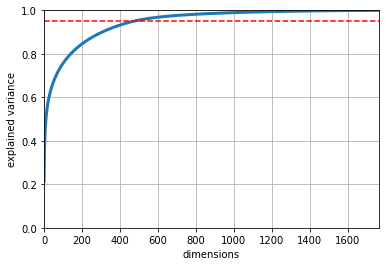

In [17]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA without reducing dimensionality
pca = PCA()
pca.fit(data_train_feature_norm)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance vs number of dimensions 
# Plot 0.95 components

plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 1764, 0, 1]) 
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.axhline(0.95, color='r', linestyle='--')
plt.grid(True)

plt.savefig('pca')
plt.show()

In [34]:
# set n_components=0.95 for training and test data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot
import numpy as np

pca = PCA(n_components=0.95)
pca.fit(data_train_feature_norm)  

data_train_feature_norm_pca = pca.transform(data_train_feature_norm)

data_test_feature_norm_pca = pca.transform(data_test_feature_norm)


print("Original shape of training data: {}".format(str(data_train_feature_norm.shape)))
print("Reduced shape of training data: {}".format(str(data_train_feature_norm_pca.shape)))   
print("Original shape of test data: {}".format(str(data_test_feature_norm.shape)))
print("Reduced shape of test data: {}".format(str(data_test_feature_norm_pca.shape)))   

Original shape of training data: (30000, 1764)
Reduced shape of training data: (30000, 473)
Original shape of test data: (5000, 1764)
Reduced shape of test data: (5000, 473)


## Step3: Implement the algorithms on default settings

### 1. K-Nearest Neighbor

In [ ]:
# default setting for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train_feature_norm_pca, data_train_label)
print("Accuracy on training set: {:.3f}".format(knn.score(data_train_feature_norm_pca, data_train_label)))

Accuracy on training set: 0.927


### 2. Logistic regression

In [ ]:
# default setting for logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(data_train_feature_norm_pca, data_train_label)
print("Accuracy on training set: {:.3f}".format(logreg.score(data_train_feature_norm_pca, data_train_label)))

Accuracy on training set: 0.928


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 3. Naïve Bayes

In [ ]:
# default setting for Naïve Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(data_train_feature_norm_pca, data_train_label)
print("Accuracy on training set: {:.3f}".format(nb.score(data_train_feature_norm_pca, data_train_label)))

Accuracy on training set: 0.787


### 4. Decision Tree

In [ ]:
# default setting for Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(data_train_feature_norm_pca, data_train_label)
print("Accuracy on training set: {:.3f}".format(DT.score(data_train_feature_norm_pca, data_train_label)))

Accuracy on training set: 1.000


### 5. SVM

In [ ]:
# default setting for SVM
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(data_train_feature_norm_pca, data_train_label)
print("Accuracy on training set: {:.3f}".format(SVM.score(data_train_feature_norm_pca, data_train_label)))

Accuracy on training set: 0.961


### 6. Bagging

In [ ]:
# default setting for Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Bagging = BaggingClassifier()
Bagging.fit(data_train_feature_norm_pca, data_train_label)
print("Accuracy on training set: {:.3f}".format(Bagging.score(data_train_feature_norm_pca, data_train_label)))

Accuracy on training set: 0.994


### 7. Random forest

In [ ]:
# default setting for Random forest
from sklearn.ensemble import RandomForestClassifier
RndF = RandomForestClassifier()
RndF.fit(data_train_feature_norm_pca, data_train_label)
print("Accuracy on training set: {:.3f}".format(RndF.score(data_train_feature_norm_pca, data_train_label)))

Accuracy on training set: 1.000


## Step4: Fine-tune hyper-parameters

In [ ]:
# Show all kinds of accuracy, recall, f1-score and visualization.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def category_show(model, x_val, y_val):
    target_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']
    y_pred = model.predict(x_val)
    print(classification_report(y_val, y_pred, target_names=target_names))
    cm = confusion_matrix(y_val, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()

### 1. K-Nearest Neighbor

In [ ]:
# para tune KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,3,5],'p': [1,2]}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid,cv=5, return_train_score=True) 
grid_search_knn.fit(data_train_feature_norm_pca, data_train_label)


print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
print("Best estimator:\n{}".format(grid_search_knn.best_estimator_))

Best parameters: {'n_neighbors': 5, 'p': 2}
Best cross-validation score: 0.89
Best estimator:
KNeighborsClassifier()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time

# the best parameter for KNN
start=time.time()

best__knn = KNeighborsClassifier(n_neighbors= 5,p = 2)
best__knn.fit(data_train_feature_norm_pca, data_train_label)
test_pred_best__knn = best__knn.predict(data_test_feature_norm_pca)
end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 13.10950756072998 Seconds


Accuracy on training set: 0.927
              precision    recall  f1-score   support

 T-shirt/Top       0.90      0.92      0.91      2972
     Trouser       0.97      0.99      0.98      3026
    Pullover       0.85      0.92      0.88      3036
       Dress       0.92      0.93      0.93      3028
        Coat       0.88      0.87      0.88      2985
      Sandal       1.00      0.95      0.97      2967
       Shirt       0.84      0.77      0.80      3001
     Sneaker       0.94      0.99      0.96      3023
         Bag       0.99      0.97      0.98      3007
  Ankle boot       0.98      0.97      0.97      2955

    accuracy                           0.93     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.93      0.93      0.93     30000



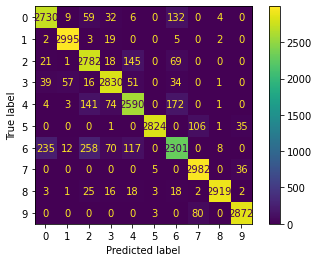

In [ ]:
# Accuracy visualization for KNN
print("Accuracy on training set: {:.3f}".format(best__knn.score(data_train_feature_norm_pca, data_train_label)))
category_show(best__knn, data_train_feature_norm_pca, data_train_label)

In [ ]:
# KNN: Accuracy on test set: 0.903

### 2. Logistic regression

In [ ]:
# para tune LogisticRegression
from sklearn.linear_model import LogisticRegression

param_grid = { 'C': [ 0.1, 1, 10, 100] }

grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid, cv=5,return_train_score=True)

grid_search_logreg.fit(data_train_feature_norm_pca, data_train_label)

print("Best parameters: {}".format(grid_search_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logreg.best_score_))
print("Best estimator:\n{}".format(grid_search_logreg.best_estimator_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best parameters: {'C': 0.1}
Best cross-validation score: 0.90
Best estimator:
LogisticRegression(C=0.1)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.linear_model import LogisticRegression
import time

# the best parameter for LogisticRegression
start=time.time()
best__logreg = LogisticRegression(C = 0.1)
best__logreg.fit(data_train_feature_norm_pca, data_train_label)
test_pred_best__logreg = best__logreg.predict(data_test_feature_norm_pca)
end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 16.151583194732666 Seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy on training set: 0.920
              precision    recall  f1-score   support

 T-shirt/Top       0.89      0.88      0.88      2972
     Trouser       0.99      0.98      0.99      3026
    Pullover       0.87      0.87      0.87      3036
       Dress       0.90      0.93      0.92      3028
        Coat       0.85      0.86      0.85      2985
      Sandal       0.99      0.98      0.98      2967
       Shirt       0.79      0.76      0.77      3001
     Sneaker       0.96      0.97      0.97      3023
         Bag       0.99      0.99      0.99      3007
  Ankle boot       0.98      0.97      0.98      2955

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.92      0.92      0.92     30000



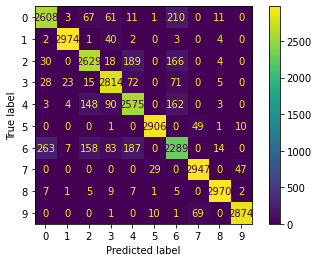

In [ ]:
# Accuracy visualization for LogisticRegression
print("Accuracy on training set: {:.3f}".format(best__logreg.score(data_train_feature_norm_pca, data_train_label)))
category_show(best__logreg, data_train_feature_norm_pca, data_train_label)

In [ ]:
# Logistic Regression: Accuracy on test set: 0.768

### 3. Naïve Bayes

In [ ]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, data_train_feature_norm_pca, data_train_label, cv=5)
print("Cross-validation scores: {}".format(scores)) #accuracy for each fold
print("Average cross-validation score: {:.2f}".format(scores.mean())) #average accuracy over all folds

Cross-validation scores: [0.78733333 0.787      0.78       0.77016667 0.7705    ]
Average cross-validation score: 0.78


In [ ]:
from sklearn.naive_bayes import GaussianNB
import time


start=time.time()
nb = GaussianNB()
nb.fit(data_train_feature_norm_pca, data_train_label)
test_pred_nb = nb.predict(data_test_feature_norm_pca)
end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 0.35889220237731934 Seconds


Accuracy on training set: 0.787
              precision    recall  f1-score   support

 T-shirt/Top       0.82      0.76      0.79      2972
     Trouser       0.95      0.85      0.90      3026
    Pullover       0.74      0.73      0.74      3036
       Dress       0.73      0.79      0.76      3028
        Coat       0.75      0.74      0.75      2985
      Sandal       0.91      0.82      0.86      2967
       Shirt       0.61      0.46      0.53      3001
     Sneaker       0.84      0.86      0.85      3023
         Bag       0.65      0.96      0.77      3007
  Ankle boot       0.93      0.90      0.91      2955

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000



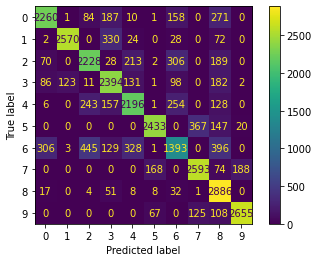

In [ ]:
# Accuracy visualization for Naive Bayes
print("Accuracy on training set: {:.3f}".format(nb.score(data_train_feature_norm_pca, data_train_label)))
category_show(nb, data_train_feature_norm_pca, data_train_label)

In [ ]:
# Logistic Regression: Accuracy on test set: 0.768

### 4. Decision Tree

In [ ]:
# Para tune Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],'max_depth':[5,10,15]}
grid_search_DT = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5, return_train_score=True) 
grid_search_DT.fit(data_train_feature_norm_pca, data_train_label)

print("Best parameters: {}".format(grid_search_DT.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_DT.best_score_))
print("Best estimator:\n{}".format(grid_search_DT.best_estimator_))

Best parameters: {'criterion': 'entropy', 'max_depth': 10}
Best cross-validation score: 0.80
Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=10)


In [ ]:
# the best parameter for Decision tree
from sklearn.tree import DecisionTreeClassifier

import time
start=time.time()
best__DT = DecisionTreeClassifier(criterion='entropy',max_depth=10)
best__DT.fit(data_train_feature_norm_pca, data_train_label)
test_pred_best__DT = best__logreg.predict(data_test_feature_norm_pca)

end=time.time()
print('Running time: %s Seconds'%(end-start))


Running time: 67.92997550964355 Seconds


Accuracy on training set: 0.883
              precision    recall  f1-score   support

 T-shirt/Top       0.86      0.86      0.86      2972
     Trouser       0.98      0.99      0.98      3026
    Pullover       0.79      0.79      0.79      3036
       Dress       0.89      0.89      0.89      3028
        Coat       0.78      0.78      0.78      2985
      Sandal       0.96      0.97      0.97      2967
       Shirt       0.68      0.69      0.68      3001
     Sneaker       0.93      0.95      0.94      3023
         Bag       0.99      0.97      0.98      3007
  Ankle boot       0.98      0.95      0.96      2955

    accuracy                           0.88     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.88      0.88      0.88     30000



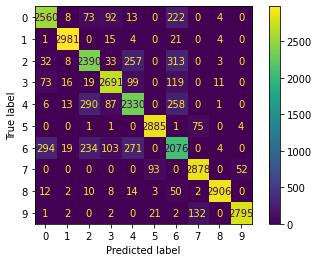

In [ ]:
# Accuracy visualization for Decision tree
print("Accuracy on training set: {:.3f}".format(best__DT.score(data_train_feature_norm_pca, data_train_label)))
category_show(best__DT, data_train_feature_norm_pca, data_train_label)

In [ ]:
# Decision tree: Accuracy on test set: 0.8965

### 5. SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [{'C':[0.1,1,10],'gamma': [0.01,0.1]}]
grid_search_SVM = GridSearchCV(SVC(), param_grid,cv=5,n_jobs= -1,return_train_score=True) 
grid_search_SVM.fit(data_train_feature_norm_pca, data_train_label)

print("Best parameters: {}".format(grid_search_SVM.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_SVM.best_score_))
print("Best estimator:\n{}".format(grid_search_SVM.best_estimator_))


Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation score: 0.91
Best estimator:
SVC(C=10, gamma=0.01)


In [35]:
# the best parameter for SVM
from sklearn.svm import SVC
import time

start=time.time()
best__SVM = SVC(C=10, gamma=0.01)
best__SVM.fit(data_train_feature_norm_pca, data_train_label)
test_pred_best__SVM = best__SVM.predict(data_test_feature_norm_pca)

end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 62.969969511032104 Seconds


Accuracy on training set: 0.994
              precision    recall  f1-score   support

 T-shirt/Top       0.99      0.99      0.99      2972
     Trouser       1.00      1.00      1.00      3026
    Pullover       0.98      0.99      0.99      3036
       Dress       0.99      1.00      1.00      3028
        Coat       0.98      0.99      0.99      2985
      Sandal       1.00      1.00      1.00      2967
       Shirt       0.99      0.98      0.98      3001
     Sneaker       0.99      1.00      1.00      3023
         Bag       1.00      1.00      1.00      3007
  Ankle boot       1.00      1.00      1.00      2955

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



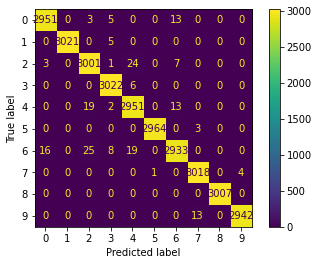

In [ ]:
# Accuracy visualization for SVM
print("Accuracy on training set: {:.3f}".format(best__SVM.score(data_train_feature_norm_pca, data_train_label)))
category_show(best__SVM, data_train_feature_norm_pca, data_train_label)

In [ ]:
# SVM: Accuracy on test set: 0.9275

### 6. Bagging

In [ ]:
# Para tune Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[200,300,500],'max_samples':[100,300,500]}
grid_search_Bagging = GridSearchCV(BaggingClassifier(), param_grid,cv=5, n_jobs= -1, return_train_score=True) 
grid_search_Bagging.fit(data_train_feature_norm_pca, data_train_label)

print("Best parameters: {}".format(grid_search_Bagging.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_Bagging.best_score_))
print("Best estimator:\n{}".format(grid_search_Bagging.best_estimator_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.80
Best estimator:
BaggingClassifier(max_samples=500, n_estimators=500)


In [ ]:
# the best parameter for Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import time

start=time.time()
best__Bagging = BaggingClassifier(n_estimators= 500,max_samples= 500)
best__Bagging.fit(data_train_feature_norm_pca, data_train_label)
test_pred_best__Bagging = best__Bagging.predict(data_test_feature_norm_pca)

end=time.time()
print('Running time: %s Seconds'%(end-start))



Running time: 174.4462308883667 Seconds


Accuracy on training set: 0.811
              precision    recall  f1-score   support

 T-shirt/Top       0.78      0.76      0.77      2972
     Trouser       0.97      0.91      0.94      3026
    Pullover       0.73      0.76      0.74      3036
       Dress       0.70      0.82      0.76      3028
        Coat       0.73      0.75      0.74      2985
      Sandal       0.89      0.91      0.90      2967
       Shirt       0.62      0.50      0.55      3001
     Sneaker       0.87      0.90      0.88      3023
         Bag       0.88      0.92      0.90      3007
  Ankle boot       0.94      0.89      0.91      2955

    accuracy                           0.81     30000
   macro avg       0.81      0.81      0.81     30000
weighted avg       0.81      0.81      0.81     30000



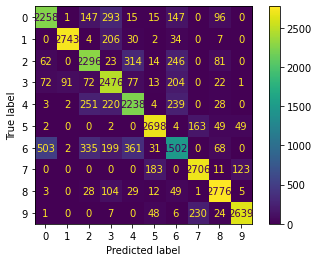

In [ ]:
# Accuracy visualization for Bagging
print("Accuracy on training set: {:.3f}".format(best__Bagging.score(data_train_feature_norm_pca, data_train_label)))
category_show(best__Bagging, data_train_feature_norm_pca, data_train_label)

In [ ]:
# Bagging: Accuracy on test set: 0.7975

### 7. Random forest

In [ ]:
# para tune regression random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[200,300,500],'max_leaf_nodes': [20,30],'max_features': ['auto', 'sqrt', 'log2']}
grid_search_RndF = GridSearchCV(RandomForestClassifier(), param_grid,cv=5, return_train_score=True) 
grid_search_RndF.fit(data_train_feature_norm_pca, data_train_label)


print("Best parameters: {}".format(grid_search_RndF.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_RndF.best_score_))
print("Best estimator:\n{}".format(grid_search_RndF.best_estimator_))


Best parameters: {'max_features': 'log2', 'max_leaf_nodes': 30, 'n_estimators': 500}
Best cross-validation score: 0.83
Best estimator:
RandomForestClassifier(max_features='log2', max_leaf_nodes=30, n_estimators=500)


In [ ]:

# the best parameter for random forest
from sklearn.ensemble import RandomForestClassifier
import time

start=time.time()

best__RndF = RandomForestClassifier(n_estimators=500, max_leaf_nodes=30 ,max_features = 'log2')
best__RndF.fit(data_train_feature_norm_pca, data_train_label)
test_pred_best__RndF = best__RndF.predict(data_test_feature_norm_pca)

end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 105.24877166748047 Seconds


Accuracy on training set: 0.840
              precision    recall  f1-score   support

 T-shirt/Top       0.76      0.78      0.77      2972
     Trouser       0.99      0.90      0.94      3026
    Pullover       0.76      0.76      0.76      3036
       Dress       0.73      0.89      0.80      3028
        Coat       0.75      0.77      0.76      2985
      Sandal       0.94      0.94      0.94      2967
       Shirt       0.71      0.52      0.60      3001
     Sneaker       0.92      0.94      0.93      3023
         Bag       0.90      0.97      0.93      3007
  Ankle boot       0.95      0.94      0.94      2955

    accuracy                           0.84     30000
   macro avg       0.84      0.84      0.84     30000
weighted avg       0.84      0.84      0.84     30000



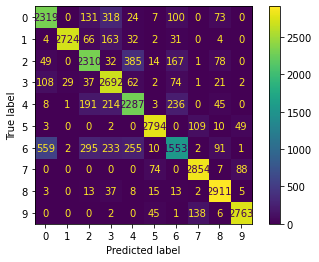

In [ ]:
# Accuracy visualization for random forest
print("Accuracy on training set: {:.3f}".format(best__RndF.score(data_train_feature_norm_pca, data_train_label)))
category_show(best__RndF, data_train_feature_norm_pca, data_train_label)

In [ ]:
# Random forest: Accuracy on test set:0.829

## Step5: Classifier comparisons

### Code running time

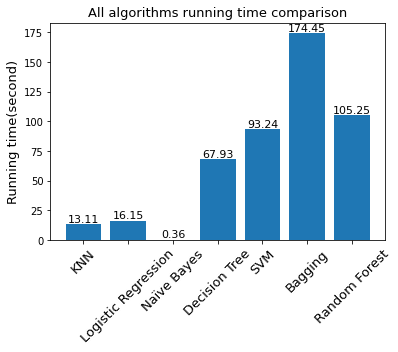

In [30]:
import matplotlib.pyplot as plt
# Compare the running time of all algorithms using their own best parameters

all_algorithms = ['KNN', 'Logistic Regression', 'Naïve Bayes', 'Decision Tree', 'SVM','Bagging','Random Forest']
running_time = [13.11,16.15,0.36,67.93,93.24,174.45,105.25]


plt.bar(all_algorithms, running_time)
plt.title('All algorithms running time comparison',fontsize=13)
plt.ylabel('Running time(second)',fontsize=13)
plt.xticks(rotation=45,fontsize=13)

for a,b in zip(all_algorithms,running_time):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('running time',bbox_inches = 'tight')

### Training Accuracy

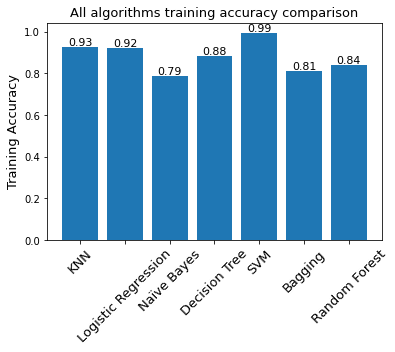

In [ ]:
import matplotlib.pyplot as plt
# Compare the Training Accuracy of all algorithms using their own best parameters

all_algorithms = ['KNN', 'Logistic Regression', 'Naïve Bayes', 'Decision Tree', 'SVM','Bagging','Random Forest']
Training_accuracy = [0.927,0.920,0.787,0.883,0.994,0.811,0.840]

plt.bar(all_algorithms, Training_accuracy)
plt.title('All algorithms training accuracy comparison',fontsize=13)
plt.ylabel('Training Accuracy',fontsize=13)
plt.xticks(rotation=45,fontsize=13)

for a,b in zip(all_algorithms,Training_accuracy):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);

###Test Accuracy

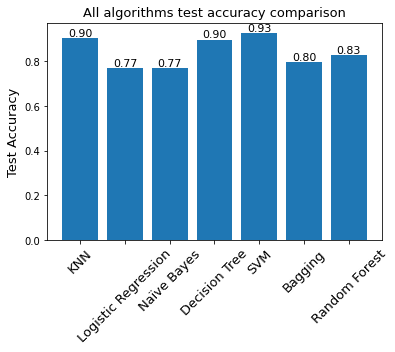

In [27]:
# test accuracy data is based on Kaggle
import matplotlib.pyplot as plt
# Compare the test Accuracy of all algorithms using their own best parameters

all_algorithms = ['KNN', 'Logistic Regression', 'Naïve Bayes', 'Decision Tree', 'SVM','Bagging','Random Forest']
test_accuracy = [0.903,0.768,0.768,0.8965,0.9275,0.7975,0.829]

plt.bar(all_algorithms, test_accuracy)
plt.title('All algorithms test accuracy comparison',fontsize=13)
plt.ylabel('Test Accuracy',fontsize=13)
plt.xticks(rotation=45,fontsize=13)

for a,b in zip(all_algorithms,test_accuracy):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('test',bbox_inches = 'tight')

## Step6: Hardware and software specifications 

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.124
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	:

In [33]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   40G   39G  52% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  817M  59% /sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        86G   45G   42G  52% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/meminfo

MemTotal:       13302920 kB
MemFree:        10078580 kB
MemAvailable:   11930768 kB
Buffers:          113632 kB
Cached:          1838940 kB
SwapCached:            0 kB
Active:          1500496 kB
Inactive:        1477788 kB
Active(anon):     927156 kB
Inactive(anon):      472 kB
Active(file):     573340 kB
Inactive(file):  1477316 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               960 kB
Writeback:             0 kB
AnonPages:       1025708 kB
Mapped:           229660 kB
Shmem:              1204 kB
KReclaimable:      86016 kB
Slab:             134900 kB
SReclaimable:      86016 kB
SUnreclaim:        48884 kB
KernelStack:        5024 kB
PageTables:        14268 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3057708 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       47212 kB
VmallocChunk:          0 kB
Percpu:          

## Step7: Prediction

In [40]:
# The best model of our prediction data on kaggle is svm.
# Select the prediction of svm model for output.
output_df = pd.DataFrame(test_pred_best__SVM, columns = ['label'])
output_df.to_csv('./Output/test_output.csv', sep=",", float_format='%d',index_label="id")